In [1]:
#Llamar al dataloader
%run DataLoader.ipynb

In [2]:
dataset.head(5)

,keyword,location,text,target,longitud
id,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88


In [3]:
null_count = dataset.location.isnull().value_counts()
null_count

False    5080
True     2533
Name: location, dtype: int64

In [4]:
null_count[0]


5080

In [5]:
dataset.location.value_counts()

USA                              104
New York                          71
United States                     50
London                            45
Canada                            29
                                ... 
Still. ??S.A.N.D.O.S??             1
music.                             1
The Kingdom of Fife, Scotland      1
Arundel                            1
#MayGodHelpUS                      1
Name: location, Length: 3341, dtype: int64

In [6]:
top_locations = dataset.location.value_counts().reset_index()
top_locations.columns = ['Ubicacion', 'Cantidad']
top_locations.head()


,Ubicacion,Cantidad
0,USA,104
1,New York,71
2,United States,50
3,London,45
4,Canada,29


In [7]:
top_locations.describe()
# hay muchas ciudades con un solo elemento, como que la "cola" tiene mucho peso

,Cantidad
count,3341.000000
mean,1.520503
std,3.022364
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,104.000000


In [8]:
# cantidad de ubicaciones con un solo elemento (son muchas!! 2818 / 3341)
top_locations.loc[top_locations['Cantidad']< 2].count()

Ubicacion    2818
Cantidad     2818
dtype: int64

Text(0.5, 1.0, 'Análisis de las ubicaciones más frecuentes')

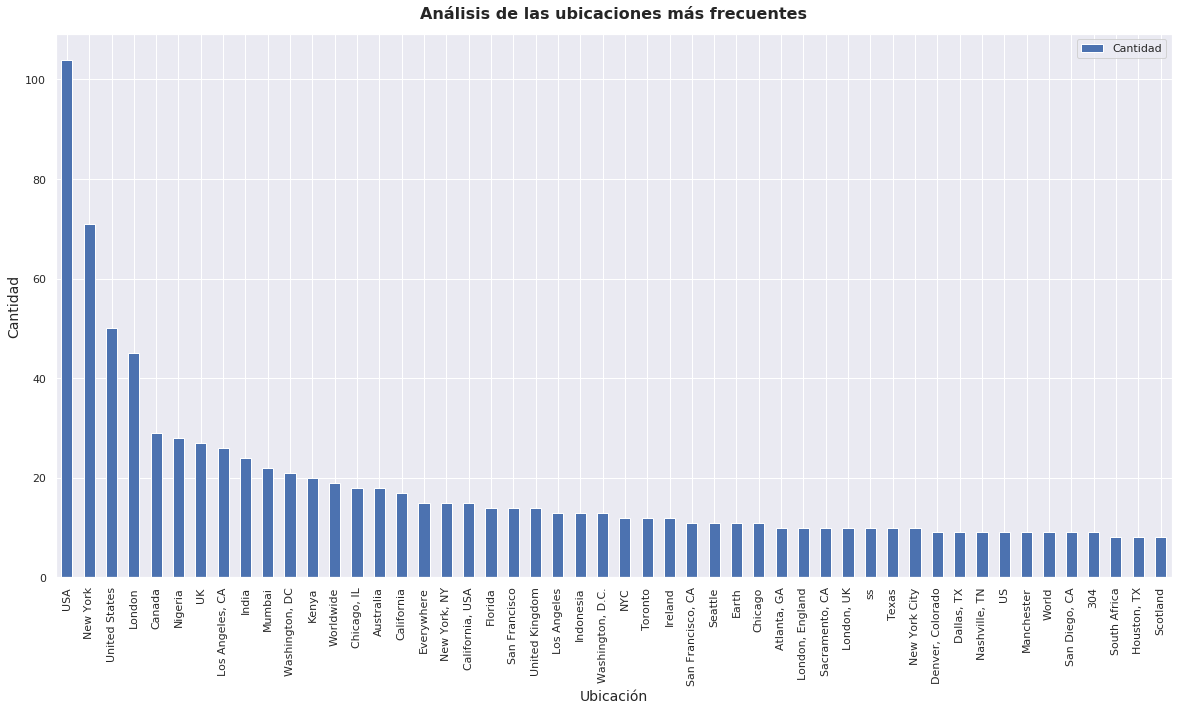

In [9]:
fig, ax = plt.subplots()


top_locations.nlargest(50, 'Cantidad').plot(kind='bar', x = 'Ubicacion', ax = ax)

plt.xlabel("Ubicación",fontsize=14)
plt.ylabel('Cantidad',fontsize=14)
plt.title('Análisis de las ubicaciones más frecuentes',fontsize=16,fontweight='bold', pad = 15)




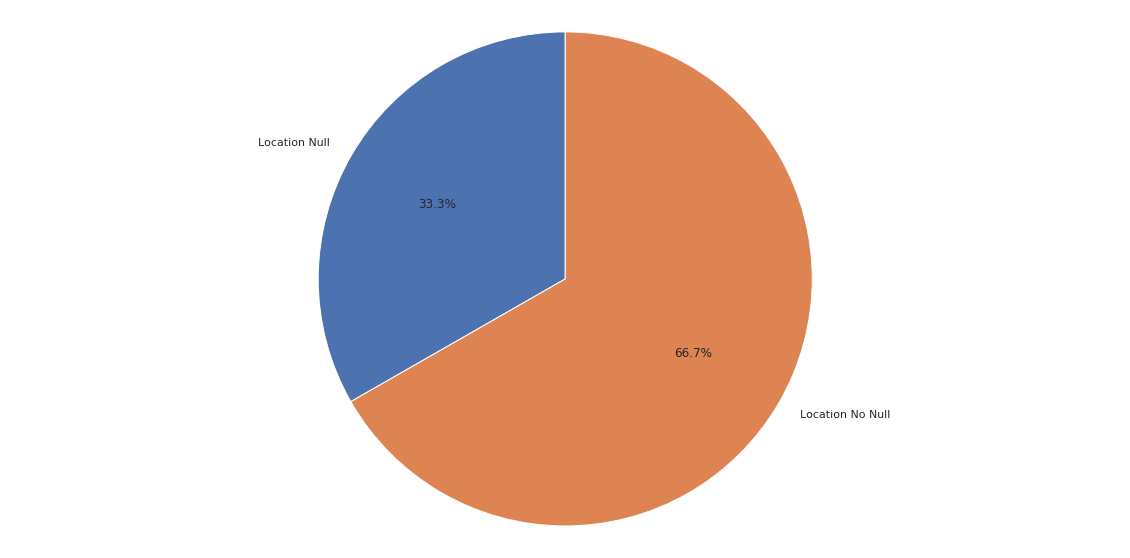

In [10]:
location_nonnull_count = null_count[0]
location_null_count = null_count[1]


labels = 'Location Null', 'Location No Null'
sizes = [location_null_count, location_nonnull_count]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()